In [1]:
%matplotlib notebook
import os
import numpy as np

import torch
from torchdiffeq import odeint

import dynamicalsystems as dyns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

In [3]:
folder = 'Lorenz'

In [4]:
try:
    os.mkdir(folder)
except:
    print(folder + " direcory not created.")

Lorenz direcory not created.


# Clean data

<IPython.core.display.Javascript object>


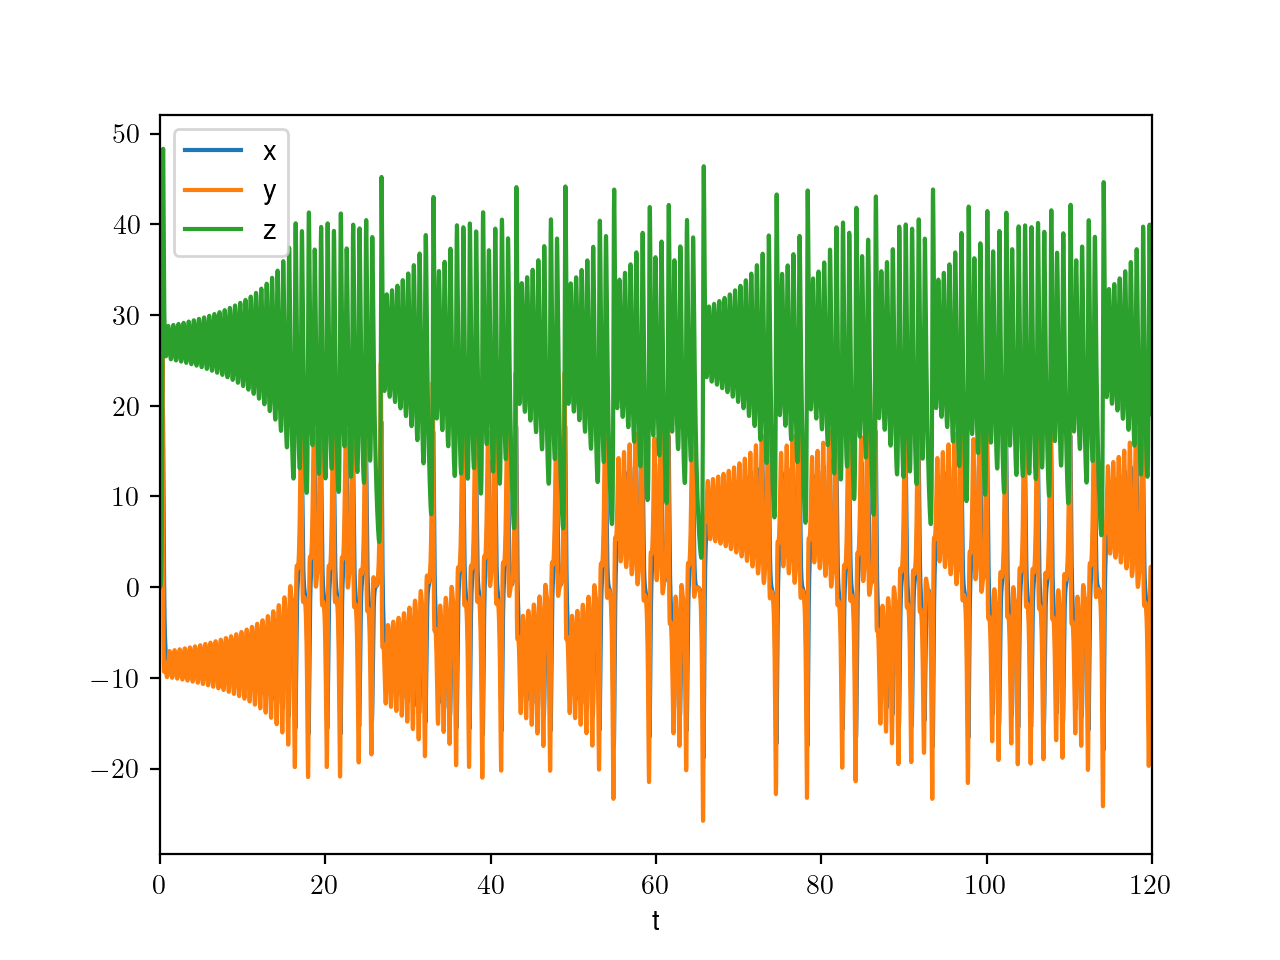

In [5]:
N_ts = 50000
t_true = torch.linspace(0, 120, 12001)
x_data = torch.tensor([1,1,0], dtype=torch.float32).reshape(1,-1) # Initial Condition
param  = [10., 28., 8./3.] # [σ, ρ, β]

dt  = t_true[1] - t_true[0]
fun = lambda t,x: dyns.Lorenz(x,t,param)

x_data = odeint(fun, x_data[0,:], t_true)
t_true = t_true[0:N_ts].reshape(-1,1)
x_data = x_data[-N_ts:,:]
    
fig = plt.figure()
axs = fig.add_subplot(1, 1, 1)
label = ['x','y','z']
[axs.plot(t_true, x_data[:,i], label = label[i]) for i in range(x_data.shape[1])]
axs.set_xlim([min(t_true), max(t_true)])
axs.set_xlabel('t')
plt.legend()
plt.show()

In [6]:
np.savetxt(folder+'/clean.txt', np.hstack([t_true.numpy(), x_data.numpy()]))

# Adding noise

In [7]:
σn = 5e-3 # fraction of (max-min)/2
x_noise = torch.zeros_like(x_data)
for i in range(x_data.shape[1]):
    σn_temp = σn*abs((max(x_data[:,i])-min(x_data[:,i]))/2)
    x_noise[:,i] = x_data[:,i] + torch.normal(0, σn_temp ,x_data[:,i].shape)

<IPython.core.display.Javascript object>


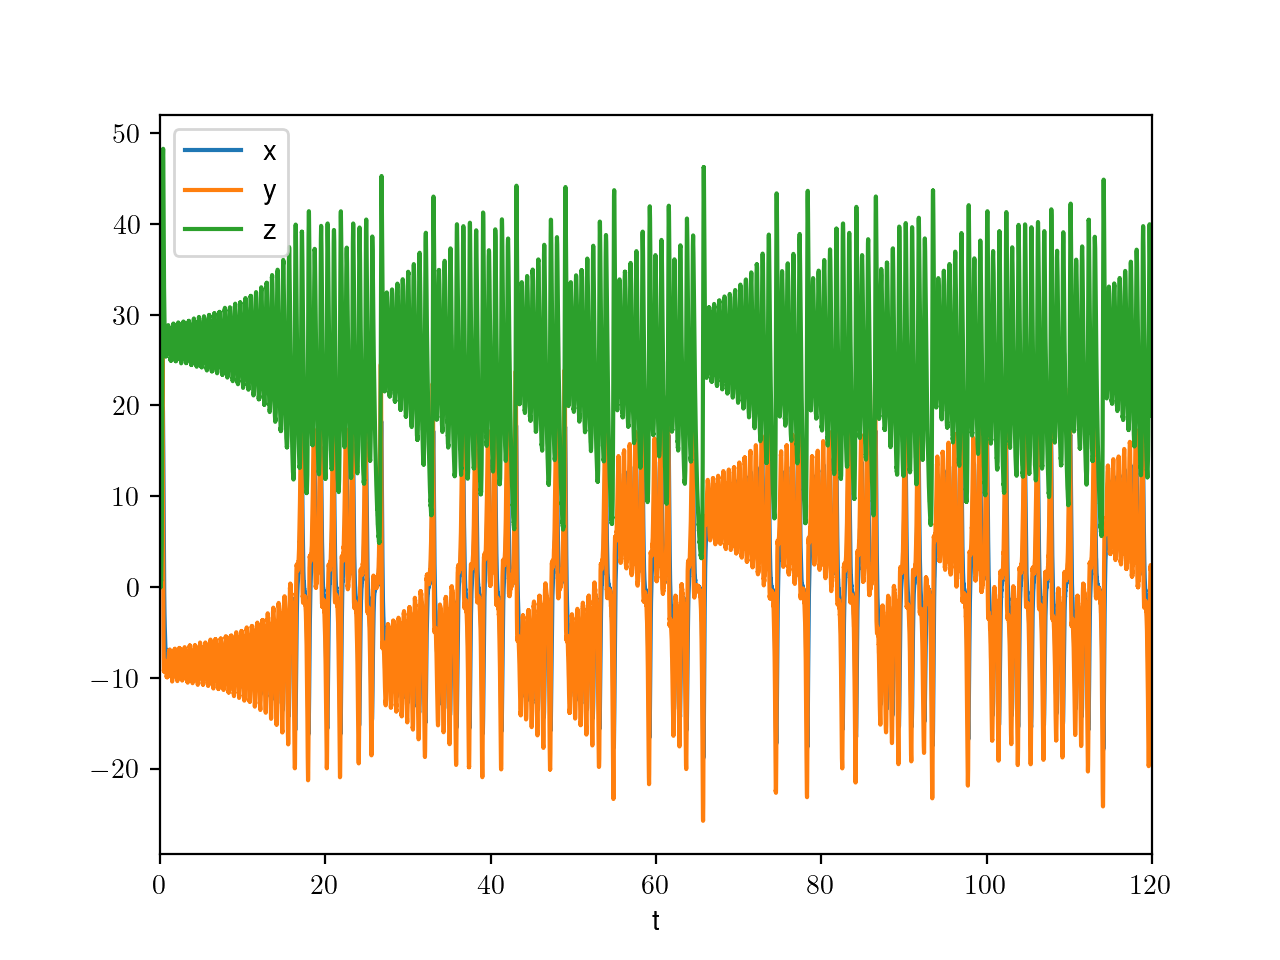

In [8]:
fig = plt.figure()
axs = fig.add_subplot(1, 1, 1)
label = ['x','y','z']
[axs.plot(t_true, x_noise[:,i], label = label[i]) for i in range(x_noise.shape[1])]
axs.set_xlim([min(t_true), max(t_true)])
axs.set_xlabel('t')
plt.legend()
plt.show()
np.savetxt(folder+'/noisy.txt', np.hstack([t_true.numpy(), x_noise.numpy()]))

# Plot 3D

<IPython.core.display.Javascript object>


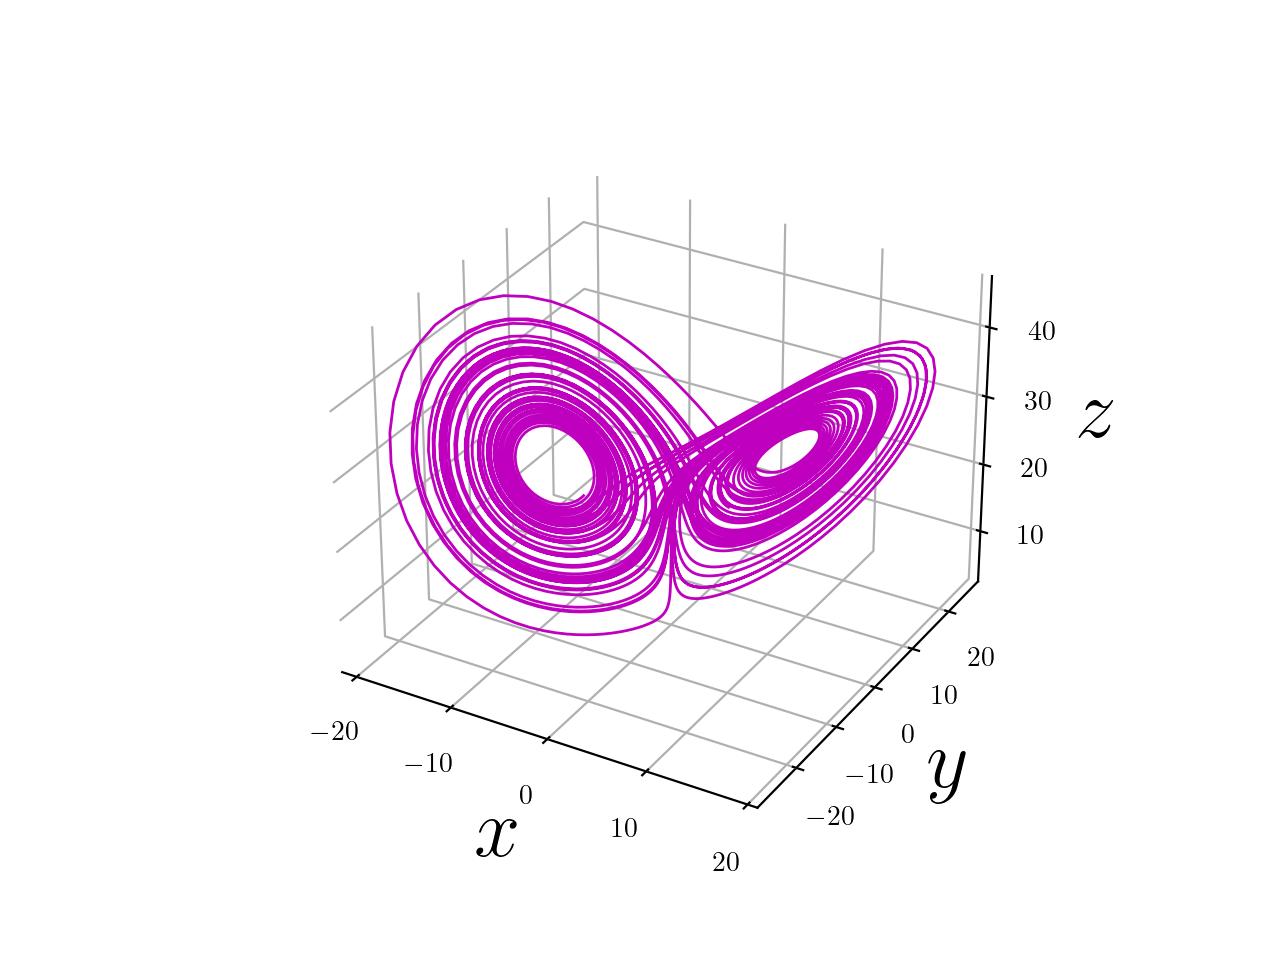

/Users/jayeshdhadphale/Desktop/All_jayesh/Work/IITM/Lab/My_Papers/1_MAPSR/venv_psr/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:151: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/Users/jayeshdhadphale/Desktop/All_jayesh/Work/IITM/Lab/My_Papers/1_MAPSR/venv_psr/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:151: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [9]:
fig = plt.figure()
axs = fig.add_subplot(projection='3d')

axs.plot(x_data[1000:8000,0],x_data[1000:8000,1],x_data[1000:8000,2],'m',linewidth=1)
color_tuple = (1.0, 1.0, 1.0, 0.0)
axs.xaxis.set_pane_color(color_tuple)
axs.yaxis.set_pane_color(color_tuple)
axs.zaxis.set_pane_color(color_tuple)
# axs.w_xaxis.line.set_color(color_tuple)
# axs.w_yaxis.line.set_color(color_tuple)
# axs.w_zaxis.line.set_color(color_tuple)
axs.set_xlabel('$x$',fontsize=30)
axs.set_ylabel('$y$',fontsize=30)
axs.set_zlabel('$z$',fontsize=30)
fig.savefig('true.pdf')

<IPython.core.display.Javascript object>


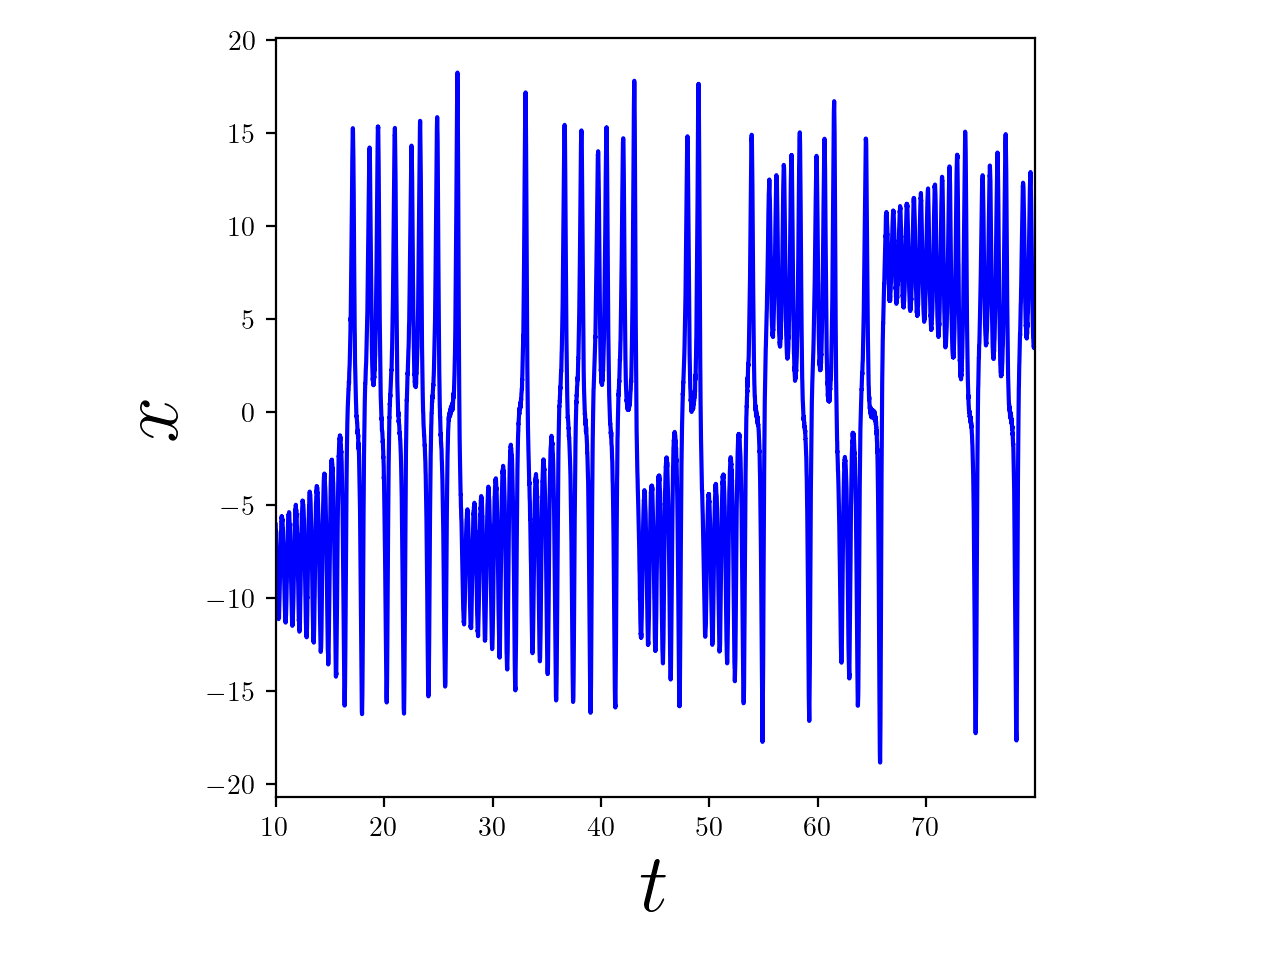

In [16]:
fig = plt.figure()
axs = fig.add_subplot(1, 1, 1)
label = ['$x$','y','z']
[axs.plot(t_true[1000:8000], x_noise[1000:8000,i], 'b',label = label[i]) for i in range(1)]
axs.set_xlim([min(t_true[1000:8000]), max(t_true[1000:8000])])
axs.set_xlabel('$t$', fontsize=30)
axs.set_ylabel('$x$', fontsize=30)
axs.set_box_aspect(1)
plt.tight_layout()
#plt.legend(fontsize=30)
plt.show()
fig.savefig('x_timeseries.pdf')

<IPython.core.display.Javascript object>


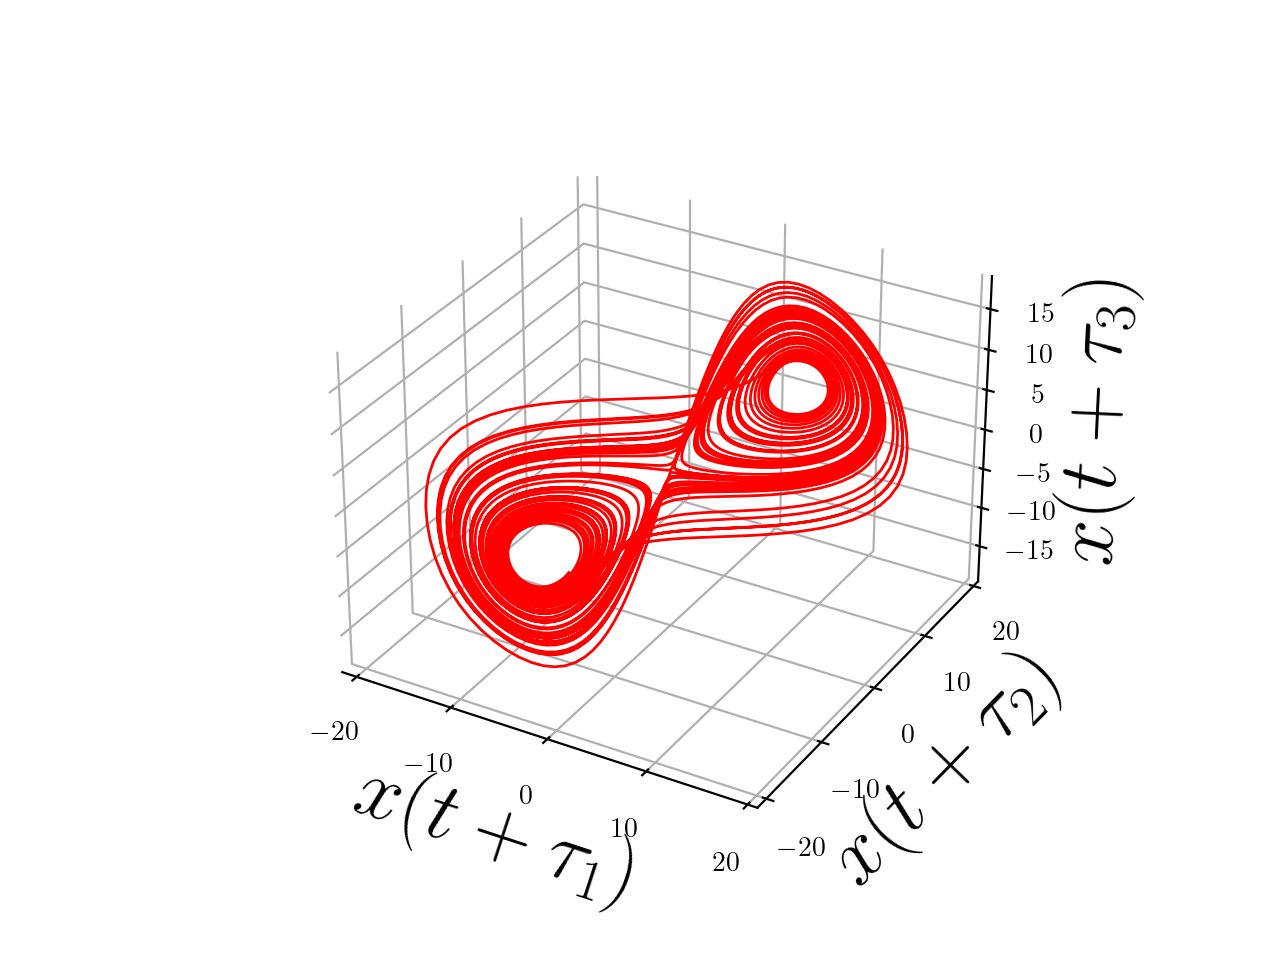

In [11]:
fig = plt.figure()
axs = fig.add_subplot(projection='3d')
τ = 10
cor = 0
axs.plot(x_data[1000:8000,cor],x_data[1000+τ:8000+τ,cor],x_data[1000+2*τ :8000+2*τ,cor],'r',linewidth=1)
color_tuple = (1.0, 1.0, 1.0, 0.0)
axs.xaxis.set_pane_color(color_tuple)
axs.yaxis.set_pane_color(color_tuple)
axs.zaxis.set_pane_color(color_tuple)
# axs.w_xaxis.line.set_color(color_tuple)
# axs.w_yaxis.line.set_color(color_tuple)
# axs.w_zaxis.line.set_color(color_tuple)
axs.set_xlabel('$x(t+\\tau_1)$',fontsize=30)
axs.set_ylabel('$x(t+\\tau_2)$',fontsize=30)
axs.set_zlabel('$x(t+\\tau_3)$',fontsize=30)
fig.savefig('recon.pdf')